## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata , study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(merged_df['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]) == True, "Mouse ID"].unique()



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dup_df = merged_df[merged_df['Mouse ID'] == 'g989']
merged_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_newindex_df = merged_df.set_index('Mouse ID')
# merged_drop_df = (merged_newindex_df.drop('g989')).reset_index()
merged_drop_df = merged_newindex_df.reset_index()
merged_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
merged_drop_count = len(merged_drop_df['Mouse ID'].unique())
print(f'The new mice count without duplicate mice cada is: {merged_drop_count}')

The new mice count without duplicate mice cada is: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_dropped_groupby_df = merged_drop_df.groupby('Drug Regimen')
tumor_mean = merged_dropped_groupby_df['Tumor Volume (mm3)'].mean()
tumor_median = merged_dropped_groupby_df['Tumor Volume (mm3)'].median()
tumor_var = merged_dropped_groupby_df['Tumor Volume (mm3)'].var()
tumor_std = merged_dropped_groupby_df['Tumor Volume (mm3)'].std()
tumor_sem = merged_dropped_groupby_df['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_stats_df = pd.DataFrame({'Tumor Vol. Average (mm3)': round(tumor_mean,2),
                          'Tumor Vol. Median (mm3)': round(tumor_median,2),
                          'Tumor Vol. Variance': round(tumor_var,2),
                          'Tumor Vol. Standard Deviation': round(tumor_std),
                          'Vol. Mean Standard Error': round(tumor_sem,3)})
sum_stats_df


,Tumor Vol. Average (mm3),Tumor Vol. Median (mm3),Tumor Vol. Variance,Tumor Vol. Standard Deviation,Vol. Mean Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,5.0,0.329
Ceftamin,52.59,51.78,39.29,6.0,0.470
Infubinol,52.88,51.82,43.13,7.0,0.492
Ketapril,55.24,53.70,68.55,8.0,0.604
Naftisol,54.33,52.51,66.17,8.0,0.596
Placebo,54.03,52.29,61.17,8.0,0.581
Propriva,52.32,50.85,42.35,7.0,0.513
Ramicane,40.22,40.67,23.49,5.0,0.321
Stelasyn,54.23,52.43,59.45,8.0,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
y_axis = merged_dropped_groupby_df['Mouse ID'].count()
y_axis

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

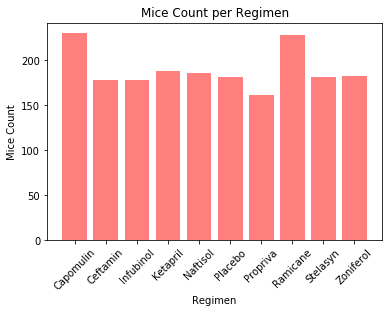

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

y_axis = merged_dropped_groupby_df['Mouse ID'].count()
x_axis = ['Capomulin','Ceftamin', 'Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

plt.bar(x=x_axis,height=y_axis, color='r', alpha=0.5, align="center")
plt.title("Mice Count per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=45)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
idgroup_df = merged_drop_df.groupby('Mouse ID')
gender_series = (idgroup_df['Sex'].unique()).value_counts()
gender_series

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Male]      125
[Female]    124
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
